<a href="https://colab.research.google.com/github/hyesungKomet/deep_learning/blob/main/spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## git clone

In [4]:
%cd /content/drive/MyDrive/machine_learning

/content/drive/MyDrive/machine_learning


In [5]:
!git clone https://github.com/hyesungKomet/deep-learning-from-scratch-2.git

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 75 (delta 11), reused 75 (delta 11), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [6]:
%cd deep-learning-from-scratch-2

/content/drive/My Drive/machine_learning/deep-learning-from-scratch-2


## spiral dataset 살펴보기

In [7]:
import sys
sys.path.append ('..')
from dataset import spiral

In [8]:
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape) #(300, 2)
print('t', t.shape) #(300, 3)

x (300, 2)
t (300, 3)


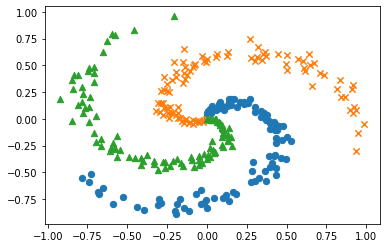

In [9]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
  plt.scatter(x[i*N: (i+1) * N, 0], x[i*N: (i+1)*N,1], s=40, marker = markers[i])
plt.show()

## Scatter Plot(산포그래프)
: 다양한 마커, 색으로 만드는 plot
* ` path = scatter(x, y, s=None, marker=None, c = None) `
* x, y: x, y축을 배열 형식으로 입력받음
* s: 마커 사이즈
* marker: 마커 모양
* c: 마커 색생

In [14]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss
import numpy as np

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I, H, O = input_size, hidden_size, output_size

    # 가중치, 편향 초기화
    W1 = 0.01 * np.random.randn(I, H)
    b1 = np.zeros(H)
    W2 = 0.01 * np.random.randn(H, O)
    b2 = np.zeros(O)

    # 계층 생성
    self.layers = [Affine(W1, b1), Sigmoid(), Affine(W2, b2)]
    self.loss_layer = SoftmaxWithLoss()

    # 가중치, 기울기를 리스트에 담기
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads

  def predict(self, x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

  def forward(self, x, t):
    score = self.predict(x)
    loss = self.loss_layer.forward(score, t)
    return loss

  def backward(self, dout=1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout

In [15]:
from common.optimizer import SGD

In [16]:
# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [17]:
# 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

In [18]:
# 학습에 필요한 변수들
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

In [21]:
for epoch in range(max_epoch):
  # 데이터 뒤섞기
  idx = np.random.permutation(data_size) 
  #np.random.permutation: 무작위로 섞인 배열 생성
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    batch_x = x[iters*batch_size:(iters+1)*batch_size]
    batch_t = t[iters*batch_size:(iters+1)*batch_size]

    # 기울기를 구해 매개변수 갱신
    loss = model.forward(batch_x, batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)

    total_loss += loss
    loss_count += 1

    # 학습 경과 출력
    if(iters+1) % 10 == 0:
      avg_loss = total_loss / loss_count
      print('| epoch: %d | iteration: %d / %d | loss: %.2f' %(epoch+1, iters+1, max_iters, avg_loss))
      loss_list.append(avg_loss)
      total_loss, loss_count = 0, 0

| epoch: 1 | iteration: 10 / 10 | loss: 1.13
| epoch: 2 | iteration: 10 / 10 | loss: 1.12
| epoch: 3 | iteration: 10 / 10 | loss: 1.11
| epoch: 4 | iteration: 10 / 10 | loss: 1.14
| epoch: 5 | iteration: 10 / 10 | loss: 1.16
| epoch: 6 | iteration: 10 / 10 | loss: 1.11
| epoch: 7 | iteration: 10 / 10 | loss: 1.12
| epoch: 8 | iteration: 10 / 10 | loss: 1.13
| epoch: 9 | iteration: 10 / 10 | loss: 1.12
| epoch: 10 | iteration: 10 / 10 | loss: 1.12
| epoch: 11 | iteration: 10 / 10 | loss: 1.10
| epoch: 12 | iteration: 10 / 10 | loss: 1.10
| epoch: 13 | iteration: 10 / 10 | loss: 1.08
| epoch: 14 | iteration: 10 / 10 | loss: 1.07
| epoch: 15 | iteration: 10 / 10 | loss: 1.00
| epoch: 16 | iteration: 10 / 10 | loss: 0.96
| epoch: 17 | iteration: 10 / 10 | loss: 0.96
| epoch: 18 | iteration: 10 / 10 | loss: 0.90
| epoch: 19 | iteration: 10 / 10 | loss: 0.88
| epoch: 20 | iteration: 10 / 10 | loss: 0.84
| epoch: 21 | iteration: 10 / 10 | loss: 0.81
| epoch: 22 | iteration: 10 / 10 | loss: 0.

## 학습결과 시각화

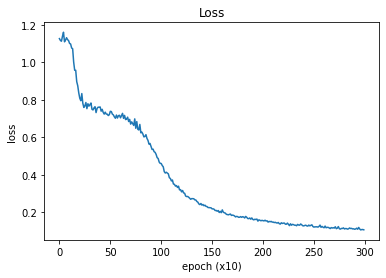

In [23]:
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('epoch (x10)')
plt.ylabel('loss')
plt.title('Loss')
plt.show()

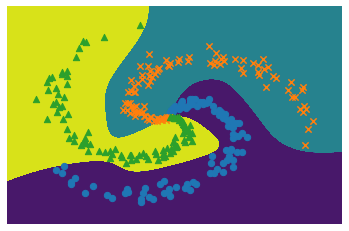

In [25]:
# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 0].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#np.meshgrid: 1차원 좌표 배열에서 N차원 직사각형 격자 만드는 함수
#np.arange(x_min, x_max, h)에서 np.arange(y_min, y_max, h)까지 배열로
x = np.c_[xx.ravel(), yy.ravel()]
#ravel(): 다차원 배열 -> 일차원으로 평평하기 해줌(flatten()같은 느낌)
score = model.predict(x)
predict_cls = np.argmax(score, axis=1)
z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, z)
#contourf: contourf(Z)는 행렬 Z의 등치선을 포함하는 채워진 등고선 플롯을 만듦
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
  plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker = markers[i])
plt.show()